# Minimal OpenSCM-Runner example with FaIR

Requires fair >= 1.6.0c3 and < 2.0.0

In [1]:
# NBVAL_IGNORE_OUTPUT
import openscm_runner

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler
/nfs/b0110/Users/mencsm/openscm-runner/src/openscm_runner/run.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.4.0+7.ga861692.dirty


In [3]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyam
from fair.forward import fair_scm
from fair.ancil import natural, cmip6_solar, cmip6_volcanic
from scmdata import ScmRun
from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR

In [5]:
fair = FAIR()

In [6]:
# NBVAL_IGNORE_OUTPUT
fair.get_version()

'1.6.1a0+7.g20d2b9c'

In [7]:
# NBVAL_IGNORE_OUTPUT
df_fair = ScmRun(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    ),
    lowercase_cols=True
)

df_fair.head(30)

time                                                                                                    2015-01-01  \
model   region scenario                  unit             variable                                                   
AIM/CGE World  ssp370                    Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   
                                                          Emissions|CO2|MAGICC Fossil and Industrial  35635.286298   
                                         kt HFC125/yr     Emissions|HFC125                               78.790600   
                                         kt HFC134a/yr    Emissions|HFC134a                             201.953400   
                                         kt HFC143a/yr    Emissions|HFC143a                              32.381000   
                                         kt HFC227ea/yr   Emissions|HFC227ea                              3.663300   
                                         kt HFC23/yr      Emissions|HFC23                                14.485700   
                                         kt HFC245fa/yr   Emissions|HFC245fa                             11.728500   
                                         kt HFC32/yr      Emissions|HFC32                                38.579200   
                                         kt HFC4310mee/yr Emissions|HFC4310mee                            1.151600   
                                         kt N2O/yr        Emissions|N2O                               10900.000000   
                                         Mt NH3/yr        Emissions|NH3                                  65.279703   
                                         Mt NOx/yr        Emissions|NOx                                 155.520450   
                                         Mt OC/yr         Emissions|OC                                   34.746024   
                                         kt SF6/yr        Emissions|SF6                                   8.020000   
                                         Mt SO2/yr        Emissions|Sulfur                              100.771167   
                                         Mt VOC/yr        Emissions|VOC                                 227.244819   
               ssp370-lowNTCF-aerchemmip Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   

time                                                                                                    2020-01-01  \
model   region scenario                  unit             variable                                       

In [13]:
# NBVAL_IGNORE_OUTPUT

# passing an empty list of an empty dict will run with defaults - which is not a good idea.
# When defaults were changed to 1750 this doesn't work with FaIR defaults which start from 1765.

x = run(
    climate_models_cfgs={
        "FAIR": [
            {
                'natural': np.concatenate((natural.Emissions.emissions[0:15,:], natural.Emissions.emissions[:336,:]), axis=0),
                'F_solar': np.concatenate((np.zeros(15), cmip6_solar.Forcing.solar[:336])),
                'F_volcanic': np.concatenate((np.zeros(15), cmip6_volcanic.Forcing.volcanic[:336])),
            }
        ], 
    },
    scenarios=df_fair,
    output_variables=(
        "Surface Temperature", 
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect|BC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|OC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|Sulfur",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
    ),
)

Note in the plots below that 'model' is the IAM that produced the scenario. In all cases, the climate model is FaIR.

In [14]:
# NBVAL_IGNORE_OUTPUT
x.get_unique_meta("climate_model", no_duplicates=True)

'FaIRv1.6.1a0+7.g20d2b9c'

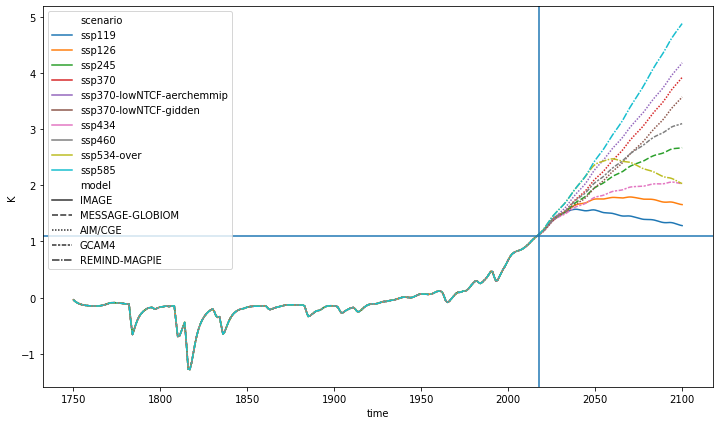

In [15]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Surface Temperature").lineplot(
    hue="scenario", style="model", ax=ax, time_axis="year"
)
ax.axhline(1.1)
ax.axvline(2018)

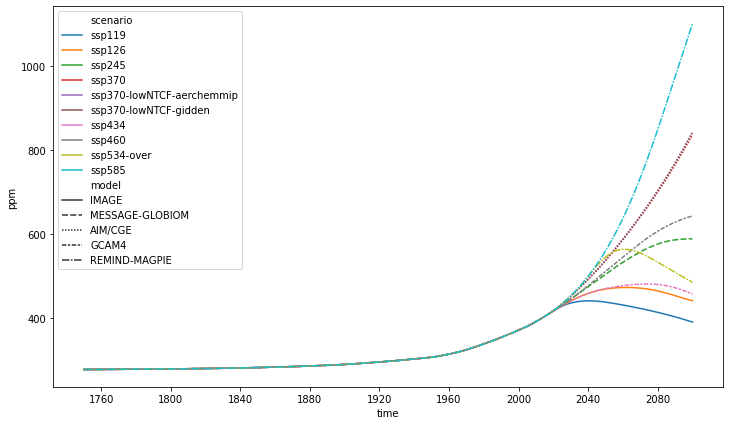

In [16]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Atmospheric Concentrations|CO2").lineplot(
    hue="scenario", style="model", ax=ax
)

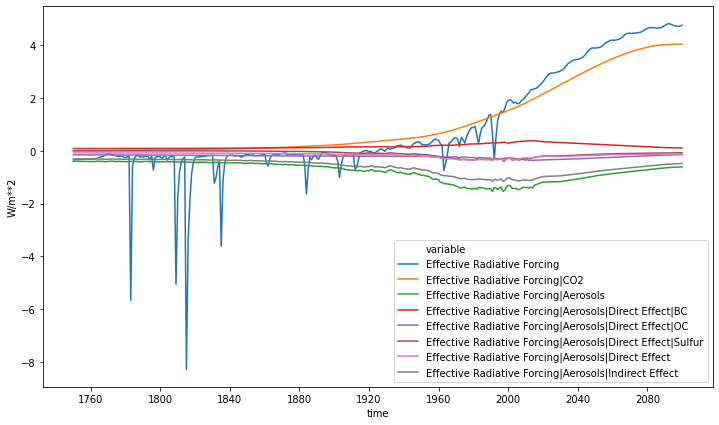

In [17]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Effective Radiative Forcing*", scenario="ssp245").lineplot(
    hue="variable", ax=ax
)